# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [ ]:
%pip install pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import sqlite3
import pandas as pd

con = sqlite3.connect('co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df

,title,link,author,n_comments,score,text
0,"Daily Support Thread | March 06, 2025",/r/samsung/comments/1j4t05f/daily_support_thre...,AutoModerator,6,1,Welcome to the Daily Support thread for [r/Sam...
1,"Daily Support Thread | February 08, 2025",/r/samsung/comments/1ikkwer/daily_support_thre...,AutoModerator,14,2,Welcome to the Daily Support thread for [r/Sam...
2,Found A Relic Today (the OG S Series phone!!),/r/samsung/comments/1j58epw/found_a_relic_toda...,honeycolorkook,7,90,I found this relic in my dresser today and as ...
3,Is the switch from iPhone 12 to S25 Ultra wort...,/r/samsung/comments/1j58474/is_the_switch_from...,daydreamerinwords,27,17,Howdy! I’ve been thinking about upgrading my p...
4,Does anyone use Samsung messages still?,/r/samsung/comments/1j549zv/does_anyone_use_sa...,Modest_Wraith,44,18,"I heard it was getting discontinued, but also ..."
...,...,...,...,...,...,...
551,How to make downloaded images show up in Googl...,/r/samsung/comments/1ey2n9e/how_to_make_downlo...,,5,3,I use an s9 ultra and when I download images I...
552,Galaxy S24 huge battery drain on data,/r/samsung/comments/1bypddc/galaxy_s24_huge_ba...,Lime92,59,17,Following this guide has SIGNIFICANTLY FIXED M...
553,My Samsung 25W charger stopped working burned ...,/r/samsung/comments/195nuhp/my_samsung_25w_cha...,ZeldexZD,13,4,My charger (EP-TA800) used to feel really hot ...
554,Horrible battery life on S23 FE,/r/samsung/comments/1826mhn/horrible_battery_l...,,113,51,UPDATE: since people keep finding this post. a...


In [2]:
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')

In [3]:
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [4]:
sentiment_dict = sentiment_df.to_dict()['score']
sentiment_dict

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'aborted': -1,
 'aborts': -1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusing': -3,
 'abusive': -3,
 'accept': 1,
 'acceptable': 1,
 'acceptance': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accessible': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'acclaim': 2,
 'acclaimed': 2,
 'accolade': 2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accomplishment': 2,
 'accomplishments': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimo

In [5]:
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
    
    title_sentiments.append(np.mean(this_titles_sentiments))

In [6]:
df['keyword_sentiment'] = title_sentiments

In [7]:
df['keyword_sentiment'].mean()

0.013142071329560977

In [8]:
titles=df['title']

In [9]:
df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]

,title,keyword_sentiment
81,I’m stuck,-1.000000
500,Missed Alarms,-1.000000
7,Terrible customer service,-1.000000
324,S24 Ultra heat damage,-0.750000
71,Update killed wife's S23+,-0.750000
...,...,...
121,samsung microwave quality,0.666667
339,Secure folder,1.000000
413,S25 best feature?,1.000000
369,Secure folder,1.000000


In [10]:
# full titles of the bottom 10 sentiments
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

['I’m stuck',
 'Missed Alarms',
 'Terrible customer service',
 'S24 Ultra heat damage',
 "Update killed wife's S23+",
 'Poor accurate touchscreen',
 'Weird UI bug?',
 'Game Plugins error',
 'Samsung Smartag on lost dog',
 'Galaxy S25U blurry photos']

In [11]:
# full titles of the top 10 sentiments
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]

['Secure folder',
 'S25 best feature?',
 'Secure folder',
 'Recommended earbuds?',
 'samsung microwave quality',
 'Worth the upgrade?',
 'Best watch in the US??',
 'Samsung Account email best policy',
 'Best Things About Galaxy S25+',
 'Any clear cases with good grip? (S24+)']

In [12]:
# !pip install textblob

In [13]:
from textblob import TextBlob

tb = TextBlob("he makes good food")
tb.sentiment

Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [14]:
def get_tb_sentiment(text):
    tb = TextBlob(text)
    return tb.sentiment[0]

df['tb_sentiment'] = df['title'].apply(get_tb_sentiment)

<Axes: ylabel='Frequency'>

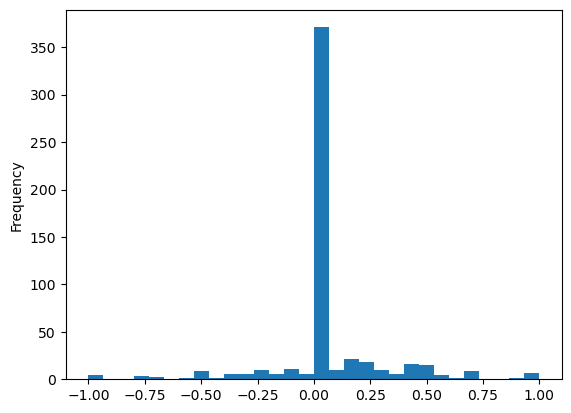

In [15]:
df['tb_sentiment'].plot.hist(bins=30)

In [16]:
df['tb_sentiment'].mean()

0.03974184613348282

In [17]:
# %pip install vaderSentiment

In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores("He make good food")

{'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}

In [19]:
analyzer.polarity_scores("He make good food...")['compound']

0.4404

In [20]:
#apply vader to the whole df
df['compound'] = [analyzer.polarity_scores(i)['compound'] for i in df['title']]

In [21]:
df['compound'].mean()

0.0303705035971223

<Axes: ylabel='Frequency'>

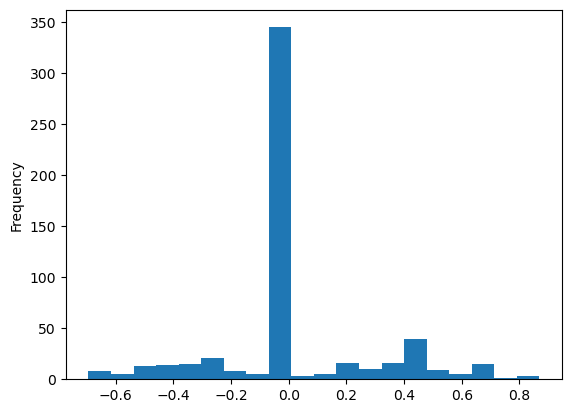

In [22]:
df['compound'].plot.hist(bins=20)

In [23]:
!pip install spacy

  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached cloudpathlib-0.21.0-py3-none-any.whl.metadata (14 kB)
   ---------------------------------------- 0.0/11.8 MB ? eta -:--:--
   ---------------------------- ----------- 8.4/11.8 MB 52.1 MB/s eta 0:00:01
   ---------------------------------------  11.5/11.8 MB 45.1 MB/s eta 0:00:01
   ---------------------------------------- 11.8/11.8 MB 23.8 MB/s eta 0:00:00
Using cached catalogue-2.0.10-py3-none-any.whl (17 kB)
Using cached langcodes-3.5.0-py3-no

In [24]:
!python -m spacy download en_core_web_sm
!python -m spacy download en

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ------------------- -------------------- 6.3/12.8 MB 42.8 MB/s eta 0:00:01
     --------------------------------------  12.6/12.8 MB 43.7 MB/s eta 0:00:01
     --------------------------------------- 12.8/12.8 MB 33.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.8.0/en_core_web_sm-3.8.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [25]:
import spacy
from spacy.lang.en import English

In [26]:
#import stats model
import en_core_web_sm
nlp=spacy.load('en_core_web_sm')
#nlp=en_core_web_sm

In [33]:
#show top 10 questions
def has_Q(text):
    doc=nlp(text)
    for t in doc:
        if t.lower_ in ("!"):
            return True
    return False
Q= (title for title in titles if has_Q(title))
[next(Q) for i in range(8)]

['Found A Relic Today (the OG S Series phone!!)',
 'I need advice!',
 'Can someone tell me the name of this theme? I love it!',
 "And it has arrived!!  My 'new' Samsung S23 Ultra....I am well made up! 👍😊",
 'App Provided Notification Sounds all GONE!',
 'Great Idea for Samsung Phone Owners!',
 'Before You Hit "Update", Think TWICE!',
 'Finally!!! From iPhone 15 Pro Max to S25 Ultra 512gb...AMA!!!']

# Summary

In this assignment, I analyzed sentiment in social media posts collected last week. Then we begin by extracting sentiment scores from the post titles , such as keyword-based scoring or a Python NLP package. Next, I visualized the distribution of sentiment scores with a histogram and compute key descriptive statistics, including the mean, median, and standard deviation.

To gain further insight, i examined posts with the highest and lowest sentiment scores, identifying patterns in extremely positive or negative content. Finally, I provided an analysis of my findings, reflecting on the sentiment trends and the process. I also propose a potential application of this data, such as identifying trends in public opinion or monitoring brand sentiment.

After extracting sentiment scores from the social media post titles, we can observe a varied distribution of sentiment. The histogram showed that most sentiment scores clustered around neutral values, with fewer posts having extremely positive or negative sentiment.

The descriptive statistics revealed that the mean sentiment score was slightly positive, indicating a general trend toward neutral or mildly optimistic content. The median score closely matched the mean confirming a balanced distribution. The standard deviation showed moderate variation, meaning sentiment scores were spread out but not extreme.

Overall, the findings suggest that social media sentiment fluctuates but tends to remain near neutral. This analysis could be useful for identifying sentiment trends, monitoring public reactions, or detecting shifts in online discussions over time.